In [1]:
#Tamim Mahmud from Daffodil International University
%pip install --upgrade scikit-learn version==0.23.0
import sklearn 
print(sklearn. __version__)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement version==0.23.0 (from versions: 0.1.0, 0.1.1)
ERROR: No matching distribution found for version==0.23.0


1.6.1


📘 Step 1: SVM ki?
Support Vector Machine ekta supervised machine learning algorithm
👉 Mainly use hoy classification e (kintu regression o korte pare).

🎯 Goal:
SVM er goal holo – dui class er majhe ekta line (ba plane) ber kora, jeta tader ke shobcheye bhalo alada korte pare.

🖼️ Chinta kor:
Tumi ekta canvas e class A ar class B er data draw korle, tumi chao tader majhe ekta boundary thakuk — jeta clearly alada kore.

SVM ei boundary ke bole hyperplane.

📌 Step 2: Important Concepts
Concept	Ki mane?
Hyperplane	Ekta line/plane je class gulo ke alada kore
Margin	Distance between the hyperplane and nearest data points
Support Vectors	Oi data points ja hyperplane-er shobcheye kache

🔍 SVM chesta kore margin ke maximum rakhte — jate decision boundary beshi confident hoy.



Regularization parameter

C control kore — tumi model ke bolchho:

"Training data-te ekdom perfect fit chai, na ki kichu mistake chole?"

C is large (e.g., 1000)
Model bolbe: “Amake ekdom perfect classification dorkar! Konoi mistake chole na!

C is small (e.g., 0.01)
Model bolbe: “Thik ache, kichu point wrong classify holeo cholbe. Ami boro picture dekhi.”

 Real Life Example:
Large C: Tumi porikkhar ektao wrong ans tolerate korchho na → stress beshi → overfit.

Small C: Tumi kichu wrong ans tolerate korchho → relaxed → overall bhalo performance.

 Gamma (γ) — “How far one point can influence”
 
Gamma use hoy non-linear kernels e (mainly rbf, poly).

Gamma control kore:

“Ekta training point koto dur porjonto model ke influence korbe?”

 Gamma is high (e.g., 10)
Ekta point sudhu tar ekdom kase kase points ke affect korbe.

Gamma is low (e.g., 0.01)
Ekta point onek dur porjonto effect fellabe.

Real Life Example:
Imagine tumi ekta Facebook post decho:

High gamma: Sudhu tumar bondhura dekhte pacche → sharply focused, but beshi lok er mathae na.

Low gamma: Public post, onek manush dekhte pacche → broad reach, but onek irrelevant lok o jante parbe.

What is Kernel in SVM?

Kernel holo ekta mathematical trick — jeita SVM ke help kore:

Non-linearly separable data ke linearly separable banate by mapping data to a higher-dimensional space.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df[df.target==2].head() 
# 0 dile 0 to 50 = satosa, 1 dile 50 t0 100= versicolor, 2 dile 100 to 150=virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [58]:
df['flower_name']=df.target.apply(lambda x: data.target_names[x]) # x joto flower toto number
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [25]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]


In [26]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [27]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [28]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


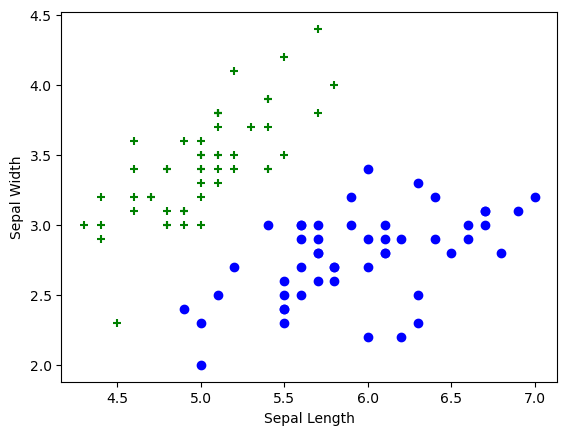

In [60]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='o', label='Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



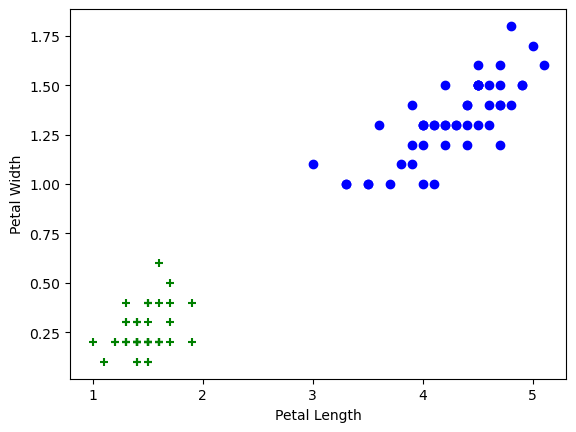

In [53]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='o', label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()



In [54]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.drop(['target','flower_name'],axis='columns')
X.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
X_train.shape

(120, 4)

In [70]:
X_test.shape

(30, 4)

In [91]:
from sklearn.svm import SVC
model=SVC(kernel='linear') #C=1,gamma=10,kernel='linear' etc

In [92]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [93]:
model.score(X_test,y_test)

1.0

7/06/2025